In [162]:
import pandas as pd
import numpy as np
from vega_datasets import data

In [3]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


# Exercises 

## First section
- sf_temps()

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [88]:
sf_df = data.sf_temps()

In [6]:
sf.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [90]:
try:
    pd.to_datetime(sf_df.date)
except ValueError as e:
    print('ValueError', e)
 sf = sf_df.set_index('date').sort_index()   

In [56]:
sf['day'] = sf.index.day_name()

Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=8759)

In [25]:
'''
daily_df = df.resample('D').mean()
daily_df
'''

sf.resample('D').mean() #resample every day

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

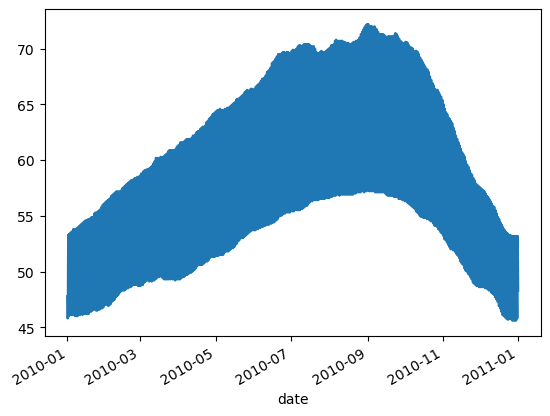

In [26]:
sf.temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

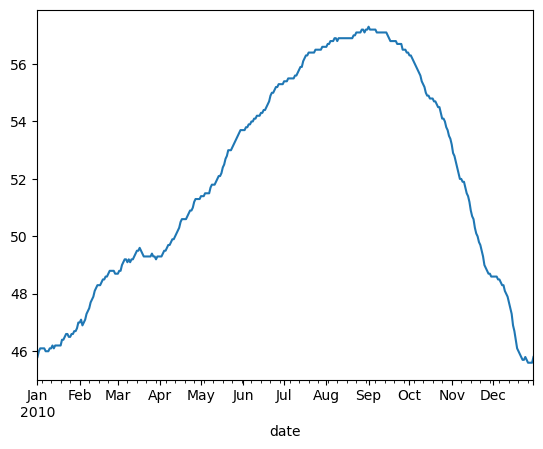

In [46]:
#resample with the minimum recording from every day
#plot the df
sf.resample('D').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

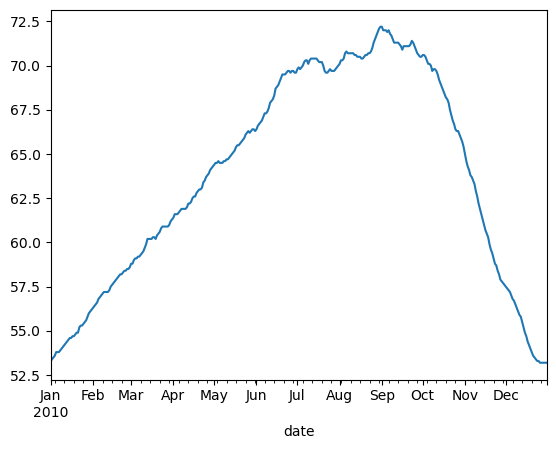

In [47]:
#resample with the maximum recording from every day
#plot the df
sf.resample('D').max().temp.plot()

4. Which month is the coldest, on average?

In [101]:
sf['month'] = sf.index.month_name()
sf.groupby('month').mean().idxmin()[0]

'January'

5. Which month has the highest average temperature?

In [102]:
#sf.groupby('month').mean().sort_values(by = 'temp', ascending = False)[:1]
sf.groupby('month').mean().idxmax()[0]

'September'

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [109]:
#resample with the maximum recording from every day
#plot the df
minmax_df = sf.resample('D').temp.agg(['min','max'])

In [110]:
minmax_df['change'] = minmax_df['max']-minmax_df['min']

In [116]:
minmax_df.resample('M').change.mean().idxmax().strftime('%B %Y')

'September 2010'

## Second section

- data.seattle_weather()

In [113]:
sea_df = data.seattle_weather()

In [119]:
try:
    pd.to_datetime(sea_df.date)
except ValueError as e:
    print('ValueError', e)
sea = sea_df.set_index('date').sort_index()  

1. Which year and month combination has the highest amount of precipitation?

In [129]:
sea.resample('M').precipitation.sum().idxmax().strftime('%Y %B')

'2015 December'

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

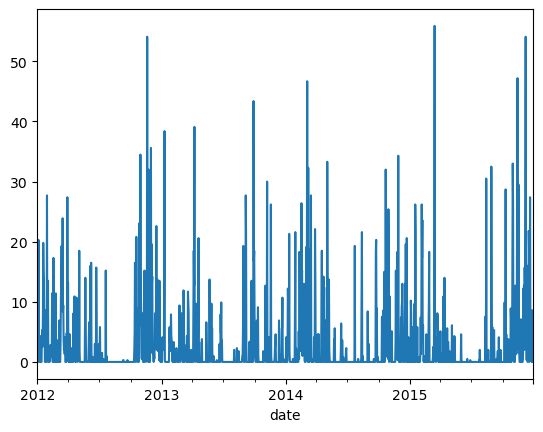

In [125]:
sea.resample('D').precipitation.sum().plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

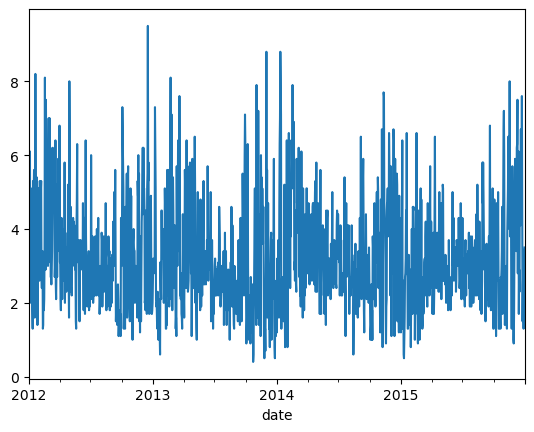

In [124]:
sea.resample('D').wind.sum().plot()

4. Which year-month combination is the windiest?

In [126]:
sea.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [130]:
sea.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [135]:
sea['weather'].unique

<bound method Series.unique of date
2012-01-01    drizzle
2012-01-02       rain
2012-01-03       rain
2012-01-04       rain
2012-01-05       rain
               ...   
2015-12-27        fog
2015-12-28        fog
2015-12-29        fog
2015-12-30        sun
2015-12-31        sun
Name: weather, Length: 1461, dtype: object>

In [154]:
sun_mask = sea['weather'] == 'sun'

In [145]:
sea.resample('Y').weather.value_counts().idxmax()

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 'sun')

In [159]:
sea[sun_mask].resample('Y').weather.value_counts().idxmax()

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 'sun')

6. In which month does it rain the most?

In [160]:
rain_mask = sea['weather'] == 'rain'

- Either this:

In [151]:
sea.resample('M').precipitation.sum().idxmax().strftime('%B %Y')

'December 2015'

- Or this:

In [166]:
rainy_sea = sea[rain_mask]

7. Which month has the most number of days with a non-zero amount of precipitation?

In [163]:
sea['did_rain'] = np.where(sea_df['precipitation']== 0,0,1)

In [165]:
sea.resample('M').did_rain.sum().idxmax().strftime('%B, %Y')

'December, 2012'